In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import statistics as stats

In [2]:
%ls

Data cleaning and wrangling.ipynb  marketing_customer_analysis.csv
customer_churn.csv                 sql_tableau_python.csv
imbalanced_data.ipynb


In [3]:
# import data
df = pd.read_csv('marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
### Formatting the cols names
#we want to make all the columns into lower case 
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
cols

['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [5]:
df.columns = cols
df.head()


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# create a copy of the df
df_or = df.copy()

In [7]:
df.info()
# there are no nulls values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

## EDA

<AxesSubplot:xlabel='customer lifetime value'>

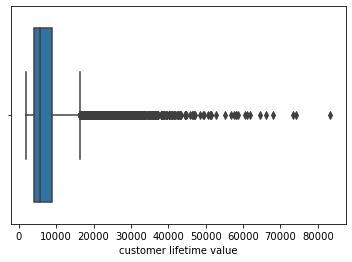

In [8]:
sns.boxplot(x=df['customer lifetime value'])

<AxesSubplot:xlabel='number of open complaints'>

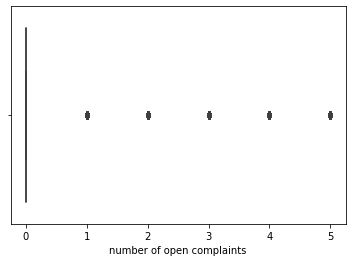

In [9]:
sns.boxplot(x=df['number of open complaints'])

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


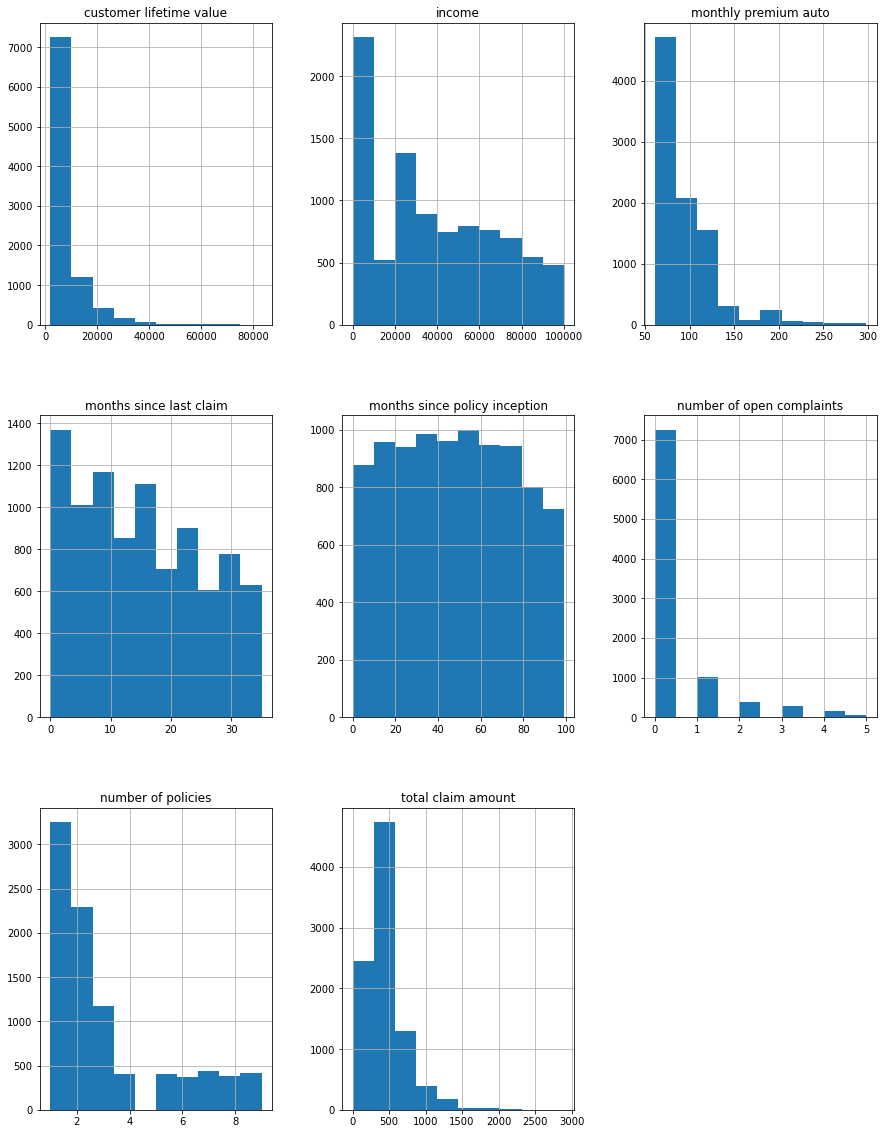

In [10]:
df.hist(figsize = (15,20));
plt.show()

### Outliers management

In [11]:
# we have to drop the outliers in customer lifetime value
#Dropping the outlier rows with standard deviation
# Outliers customer lifetime value
factor = 3
upper_lim = df['customer lifetime value'].mean () + df['customer lifetime value'].std () * factor
lower_lim = df['customer lifetime value'].mean () - df['customer lifetime value'].std () * factor

df = df[(df['customer lifetime value'] < upper_lim) & (df['customer lifetime value'] > lower_lim)]

In [12]:
# we have to drop the outliers in customer lifetime value
#Dropping the outlier rows with standard deviation
#monthly premium auto
factor = 3
upper_lim = df['monthly premium auto'].mean () + df['monthly premium auto'].std () * factor
lower_lim = df['monthly premium auto'].mean () - df['monthly premium auto'].std () * factor

df = df[(df['monthly premium auto'] < upper_lim) & (df['monthly premium auto'] > lower_lim)]

In [13]:
# we have to drop the outliers in customer lifetime value
#Dropping the outlier rows with standard deviation
#number of policies
factor = 3
upper_lim = df['number of policies'].mean () + df['number of policies'].std () * factor
lower_lim = df['number of policies'].mean () - df['number of policies'].std () * factor

df = df[(df['number of policies'] < upper_lim) & (df['number of policies'] > lower_lim)]

In [14]:
# we have to drop the outliers in customer lifetime value
#Dropping the outlier rows with standard deviation
#total claim amount
factor = 3
upper_lim = df['total claim amount'].mean () + df['total claim amount'].std () * factor
lower_lim = df['total claim amount'].mean () - df['total claim amount'].std () * factor

df = df[(df['total claim amount'] < upper_lim) & (df['total claim amount'] > lower_lim)]

In [15]:
# we have to drop the outliers in customer lifetime value
#Dropping the outlier rows with standard deviation
# monthly premium auto
factor = 3
upper_lim = df['monthly premium auto'].mean () + df['monthly premium auto'].std () * factor
lower_lim = df['monthly premium auto'].mean () - df['monthly premium auto'].std () * factor

df = df[(df['monthly premium auto'] < upper_lim) & (df['monthly premium auto'] > lower_lim)]

### Normalise the continuos variables


In [16]:
# Numeric variables

In [17]:
# the continuos variable in this case are total claim amount, customer lifetime value, income

<AxesSubplot:>

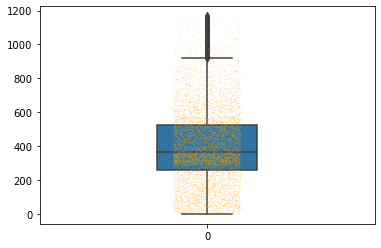

In [18]:
# min-max-scaler total claim amount
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=df['total claim amount'], width=.3)
sns.stripplot(data=df['total claim amount'], color="orange", jitter=0.1, size=.5, ax=ax)

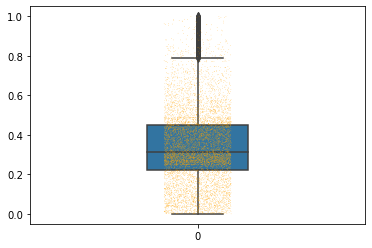

In [19]:
from sklearn.preprocessing import MinMaxScaler
df['total claim amount']=MinMaxScaler().fit_transform(df['total claim amount'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=df['total claim amount'], width=.3)
sns.stripplot(data=df['total claim amount'], color="orange", jitter=0.1, size=.5, ax=ax);

In [20]:
df['total claim amount'].head()

0    0.329757
1    0.969752
2    0.485468
3    0.454104
4    0.118314
Name: total claim amount, dtype: float64

<AxesSubplot:>

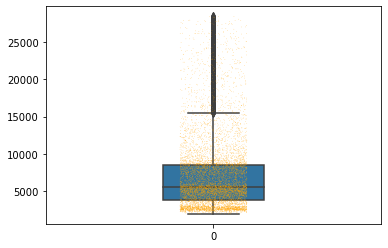

In [21]:
# min-max-scaler customer lifetime value
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=df['customer lifetime value'], width=.3)
sns.stripplot(data=df['customer lifetime value'], color="orange", jitter=0.1, size=.5, ax=ax)

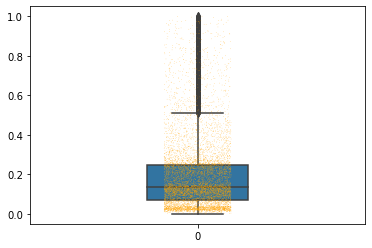

In [22]:
df['customer lifetime value']=MinMaxScaler().fit_transform(df['customer lifetime value'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=df['customer lifetime value'], width=.3)
sns.stripplot(data=df['customer lifetime value'], color="orange", jitter=0.1, size=.5, ax=ax);

<AxesSubplot:>

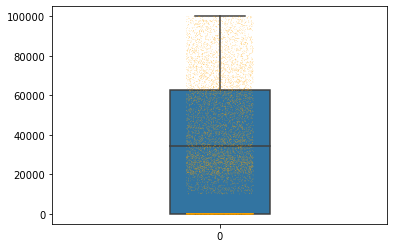

In [23]:
# min-max-scaler income
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=df['income'], width=.3)
sns.stripplot(data=df['income'], color="orange", jitter=0.1, size=.5, ax=ax)

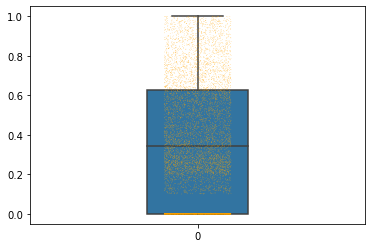

In [24]:
df['income']=MinMaxScaler().fit_transform(df['income'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=df['income'], width=.3)
sns.stripplot(data=df['income'], color="orange", jitter=0.1, size=.5, ax=ax);

In [25]:
# Categorical values
#need to encode te categorical value using the dummies or hot encoder method


In [26]:
df['employmentstatus'].value_counts()

Employed         5274
Unemployed       2119
Medical Leave     405
Disabled          374
Retired           274
Name: employmentstatus, dtype: int64

In [27]:
df['education'].value_counts()

Bachelor                2546
College                 2490
High School or Below    2403
Master                   680
Doctor                   327
Name: education, dtype: int64

In [28]:
df['sales channel'].value_counts()

Agent          3210
Branch         2393
Call Center    1625
Web            1218
Name: sales channel, dtype: int64

In [29]:
df['vehicle size'].value_counts()

Medsize    5938
Small      1620
Large       888
Name: vehicle size, dtype: int64

In [30]:
df['renew offer type'].value_counts()

Offer1    3418
Offer2    2754
Offer3    1327
Offer4     947
Name: renew offer type, dtype: int64

In [31]:
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,0.032522,No,Basic,Bachelor,2/24/11,Employed,F,0.562847,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,0.329757,Two-Door Car,Medsize
1,QZ44356,Arizona,0.190941,No,Extended,Bachelor,1/31/11,Unemployed,F,0.000000,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,0.969752,Four-Door Car,Medsize
2,AI49188,Nevada,0.412934,No,Premium,Bachelor,2/19/11,Employed,F,0.487763,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,0.485468,Two-Door Car,Medsize
3,WW63253,California,0.215979,No,Basic,Bachelor,1/20/11,Unemployed,M,0.000000,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,0.454104,SUV,Medsize
4,HB64268,Washington,0.034407,No,Basic,Bachelor,2/3/11,Employed,M,0.438443,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,0.118314,Four-Door Car,Medsize


In [32]:
# encoding:
# employmentstatus, gender, coverage, education, response, policy type, vehicle size
# first encoding method

In [33]:
df["coverage"] = df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,0.032522,No,0,Bachelor,2/24/11,Employed,F,0.562847,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,0.329757,Two-Door Car,Medsize
1,QZ44356,Arizona,0.190941,No,1,Bachelor,1/31/11,Unemployed,F,0.000000,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,0.969752,Four-Door Car,Medsize
2,AI49188,Nevada,0.412934,No,2,Bachelor,2/19/11,Employed,F,0.487763,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,0.485468,Two-Door Car,Medsize
3,WW63253,California,0.215979,No,0,Bachelor,1/20/11,Unemployed,M,0.000000,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,0.454104,SUV,Medsize
4,HB64268,Washington,0.034407,No,0,Bachelor,2/3/11,Employed,M,0.438443,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,0.118314,Four-Door Car,Medsize


In [34]:
df["gender"] = df["gender"].map({"F" : 0, "M" : 1})

In [35]:
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,0.032522,No,0,Bachelor,2/24/11,Employed,0,0.562847,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,0.329757,Two-Door Car,Medsize
1,QZ44356,Arizona,0.190941,No,1,Bachelor,1/31/11,Unemployed,0,0.000000,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,0.969752,Four-Door Car,Medsize
2,AI49188,Nevada,0.412934,No,2,Bachelor,2/19/11,Employed,0,0.487763,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,0.485468,Two-Door Car,Medsize
3,WW63253,California,0.215979,No,0,Bachelor,1/20/11,Unemployed,1,0.000000,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,0.454104,SUV,Medsize
4,HB64268,Washington,0.034407,No,0,Bachelor,2/3/11,Employed,1,0.438443,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,0.118314,Four-Door Car,Medsize


In [36]:
df["employmentstatus"] = df["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1,"Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})

In [37]:
df["education"] = df["education"].map({"Bachelor" : 0, "College" : 1,"High School or Below" : 2, "Master" : 3, "Doctor" : 4})

In [38]:
df["vehicle size"] = df["vehicle size"].map({"Medsize" : 0, "Small" : 1,"Large" : 2})

In [39]:
df["response"] = df["response"].map({"No" : 0, "Yes" : 1})

In [40]:
df["sales channel"] = df["sales channel"].map({"Agent" : 0, "Branch" : 1,"Call Center" : 2, "Web" : 3})

In [41]:
#df["policy type"] = df["policy type"].map({"Staff car" : 0, "Corporate car" : 1,"Special Auto" : 2})

In [42]:
df["vehicle class"] = df["vehicle class"].map({"Four-Door Car" : 0, "Two-Door Car" : 1,"SUV" : 2, "Sports Car" : 3})

In [43]:
df["renew offer type"] = df["renew offer type"].map({"Offer1" : 0, "Offer2" : 1,"Offer3" : 2, "Offer4" : 3})

In [44]:
# one hot encoder for policy type, policy and state
encoded_columns = pd.get_dummies(df['state'])
df = df.join(encoded_columns).drop('state', axis=1)


In [45]:
encoded_columns = pd.get_dummies(df['policy type'])
df = df.join(encoded_columns).drop('policy type', axis=1)

In [46]:
encoded_columns = pd.get_dummies(df['policy'])
df = df.join(encoded_columns).drop('policy', axis=1)

In [47]:
encoded_columns = pd.get_dummies(df['location code'])
df = df.join(encoded_columns).drop('location code', axis=1)

In [48]:
encoded_columns = pd.get_dummies(df['marital status'])
df = df.join(encoded_columns).drop('marital status', axis=1)

In [65]:
df.head()

,customer,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,monthly premium auto,...,Special L3,Rural,Suburban,Urban,Divorced,Married,Single,year,month,week
0,BU79786,0.032522,0,0,0,2/24/11,0,0,0.562847,69,...,0,0,1,0,0,1,0,2011,2,8
1,QZ44356,0.190941,0,1,0,1/31/11,1,0,0.000000,94,...,0,0,1,0,0,0,1,2011,1,5
2,AI49188,0.412934,0,2,0,2/19/11,0,0,0.487763,108,...,0,0,1,0,0,1,0,2011,2,7
3,WW63253,0.215979,0,0,0,1/20/11,1,1,0.000000,106,...,0,0,1,0,0,1,0,2011,1,3
4,HB64268,0.034407,0,0,0,2/3/11,0,1,0.438443,73,...,0,1,0,0,0,0,1,2011,2,5


In [50]:
df.shape

(8446, 42)

In [51]:
# the encoding is done

### Date into int

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8446 entries, 0 to 9133
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       8446 non-null   object 
 1   customer lifetime value        8446 non-null   float64
 2   response                       8446 non-null   int64  
 3   coverage                       8446 non-null   int64  
 4   education                      8446 non-null   int64  
 5   effective to date              8446 non-null   object 
 6   employmentstatus               8446 non-null   int64  
 7   gender                         8446 non-null   int64  
 8   income                         8446 non-null   float64
 9   monthly premium auto           8446 non-null   int64  
 10  months since last claim        8446 non-null   int64  
 11  months since policy inception  8446 non-null   int64  
 12  number of open complaints      8446 non-null   i

In [57]:
 df['year']= pd.DatetimeIndex(df['effective to date']).year

In [64]:
df['month']= pd.DatetimeIndex(df['effective to date']).month

In [62]:
df['week']= pd.DatetimeIndex(df['effective to date']).week

<ipython-input-62-8ba3614dd972>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']= pd.DatetimeIndex(df['effective to date']).week


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8446 entries, 0 to 9133
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       8446 non-null   object 
 1   customer lifetime value        8446 non-null   float64
 2   response                       8446 non-null   int64  
 3   coverage                       8446 non-null   int64  
 4   education                      8446 non-null   int64  
 5   effective to date              8446 non-null   object 
 6   employmentstatus               8446 non-null   int64  
 7   gender                         8446 non-null   int64  
 8   income                         8446 non-null   float64
 9   monthly premium auto           8446 non-null   int64  
 10  months since last claim        8446 non-null   int64  
 11  months since policy inception  8446 non-null   int64  
 12  number of open complaints      8446 non-null   i

In [70]:
del df['effective to date']

In [71]:
df.head()

,customer,customer lifetime value,response,coverage,education,employmentstatus,gender,income,monthly premium auto,months since last claim,...,Special L3,Rural,Suburban,Urban,Divorced,Married,Single,year,month,week
0,BU79786,0.032522,0,0,0,0,0,0.562847,69,32,...,0,0,1,0,0,1,0,2011,2,8
1,QZ44356,0.190941,0,1,0,1,0,0.000000,94,13,...,0,0,1,0,0,0,1,2011,1,5
2,AI49188,0.412934,0,2,0,0,0,0.487763,108,18,...,0,0,1,0,0,1,0,2011,2,7
3,WW63253,0.215979,0,0,0,1,1,0.000000,106,18,...,0,0,1,0,0,1,0,2011,1,3
4,HB64268,0.034407,0,0,0,0,1,0.438443,73,12,...,0,1,0,0,0,0,1,2011,2,5
